In [15]:
import pandas as pd

In [ ]:
pixels = pd.read_csv("../image_flat/flattened_images.csv")
train_metadata = pd.read_csv("../train/train_metadata.csv")
merged_df = pixels.merge(train_metadata, on='image_path')
hog_pca = pd.read_csv("../train/Features/hog_pca.csv")
color_hist = pd.read_csv("../train/Features/color_histogram.csv")
additional_features = pd.read_csv("../train/Features/additional_features.csv")
digits = pd.read_csv("../dig_feature/ocr_digit_detection.csv")


merged_df = pixels.merge(train_metadata, on='image_path')


merged_df = merged_df.merge(hog_pca, on='image_path')
merged_df = merged_df.merge(color_hist, on='image_path')
merged_df = merged_df.merge(additional_features, on='image_path')
merged_df = merged_df.merge(digits, on='image_path')
merged_df= merged_df.drop(columns = ['id'])

# display(merged_df)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_df, test_df = train_test_split(
    merged_df, 
    test_size=0.2, 
    stratify=merged_df['ClassId'], 
    random_state=50
)


features = train_df.columns.difference(['image_path', 'ClassId'])


scaler = StandardScaler()


scaler.fit(train_df[features])


train_df[features] = train_df[features].astype(float)
test_df[features] = test_df[features].astype(float)


train_df.loc[:, features] = scaler.transform(train_df[features])
test_df.loc[:, features] = scaler.transform(test_df[features])


X_train = train_df.drop(['image_path', 'ClassId'], axis=1).values
y_train = train_df['ClassId'].values

X_test = test_df.drop(['image_path', 'ClassId'], axis=1).values
y_test = test_df['ClassId'].values

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


clf = MLPClassifier(hidden_layer_sizes=(500,), max_iter=300, random_state=50)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8852


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd


cm = confusion_matrix(y_test, y_pred)


num_classes = cm.shape[0]


misclassified_counts = cm.sum(axis=1) - np.diag(cm)


df_misclass = pd.DataFrame({
    'Class': range(num_classes),  
    'Misclassified Count': misclassified_counts,
    'Total Samples': cm.sum(axis=1),
    'Misclassification Rate': misclassified_counts / cm.sum(axis=1)
})


df_misclass_sorted = df_misclass.sort_values(by='Misclassification Rate', ascending=False)
display(df_misclass_sorted.head(10))  

,Class,Misclassified Count,Total Samples,Misclassification Rate
0,0,3,6,0.500000
21,21,4,9,0.444444
23,23,6,14,0.428571
20,20,4,10,0.400000
27,27,2,7,0.285714
42,42,2,7,0.285714
32,32,2,7,0.285714
3,3,11,39,0.282051
5,5,14,52,0.269231
29,29,2,8,0.250000


In [23]:
import matplotlib as mpl
def printSigns(accuracies, top_n, reverse=False):
    if reverse == True:
        accuracies = list(reversed(accuracies))
    for i in range(top_n):
        classID = accuracies[i][1]
        mpl.pyplot.subplot(2,top_n//2, i + 1)
        img = mpl.image.imread(f'../Sign Images/{classID}.png')
        mpl.pyplot.imshow(img)
    mpl.pyplot.show()

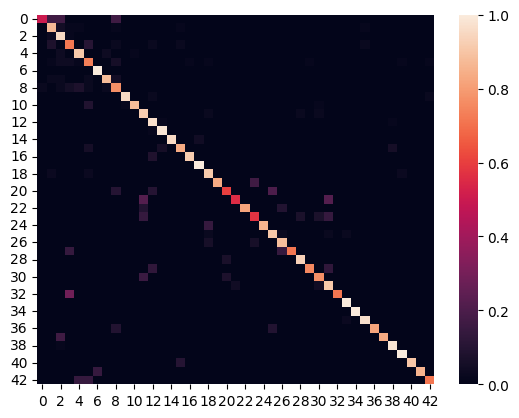

In [24]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm)
class_accuracies = sorted((cm[i][i], i) for i in range(43))

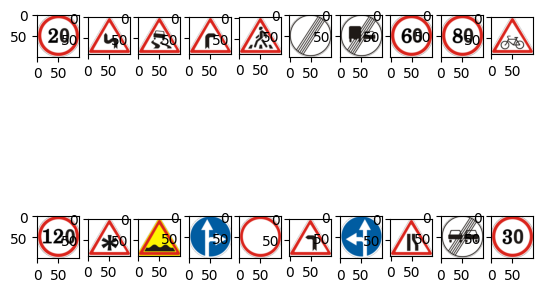

In [25]:
printSigns(class_accuracies, 20)

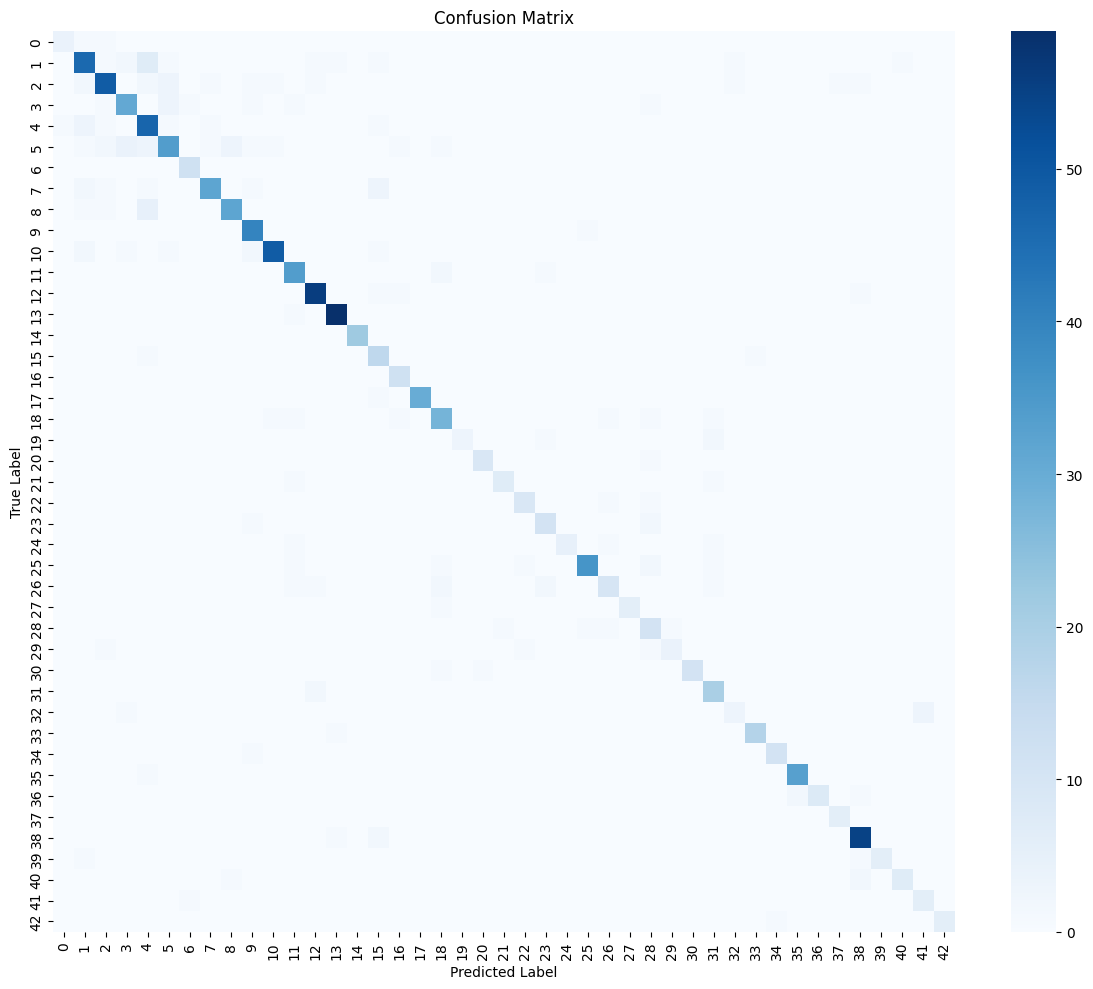

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues')  

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()